In [7]:
from datetime import datetime
from io import BytesIO
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_excel('data.xlsx',parse_dates=['date']).set_index('date').ffill().loc["2014":]
data

,CEA,SZA,SHEA,BEA,GDEA,TJEA,HBEA,CQEA,FJEA
date,,,,,,,,,
2014-01-02,NaN,69.64,29.70,51.50,60.00,26.85,NaN,NaN,NaN
2014-01-03,NaN,70.00,29.80,51.50,60.00,26.87,NaN,NaN,NaN
2014-01-06,NaN,72.00,29.70,51.50,60.00,26.83,NaN,NaN,NaN
2014-01-07,NaN,73.00,29.70,50.00,60.00,26.77,NaN,NaN,NaN
2014-01-08,NaN,75.00,29.80,50.75,60.00,26.54,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-04-25,60.0,7.87,60.00,60.00,79.70,28.00,46.99,40.0,24.00
2022-04-26,60.0,7.08,59.50,60.00,79.83,28.00,46.99,40.0,26.40
2022-04-27,59.0,7.08,60.00,60.00,79.83,28.00,46.88,40.0,23.76


In [9]:
col = data.columns
col


Index(['CEA', 'SZA', 'SHEA', 'BEA', 'GDEA', 'TJEA', 'HBEA', 'CQEA', 'FJEA'], dtype='object')

  $$    y_t = a_{S_t} + x_t' \beta_{S_t} + \varepsilon_t \\
      \varepsilon_t \sim N(0, \sigma_{S_t}^2)$$

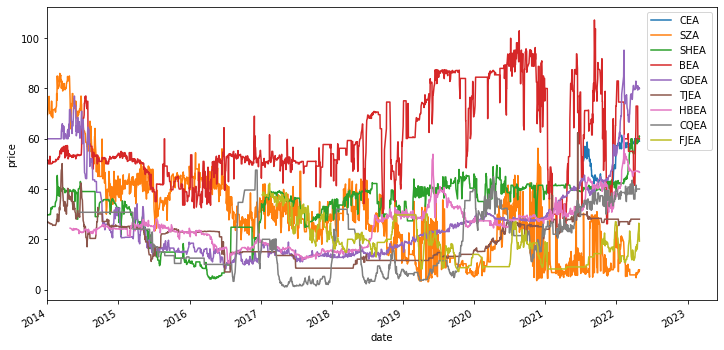

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for city in col:
    dta = data.loc[:,city].dropna()
    dta.plot(ax = ax)
ax.legend(loc="upper right")
ax.set_ylabel("price")
ax.set_xlim("2014","2023-6")
fig.savefig("price series.png",transparent=True)

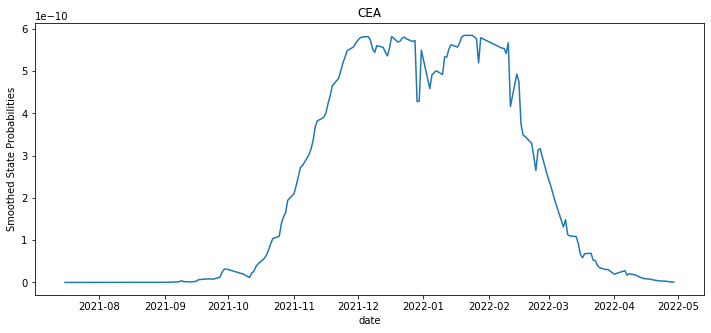

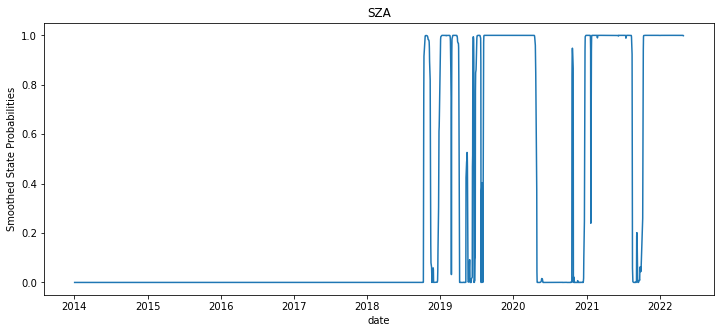

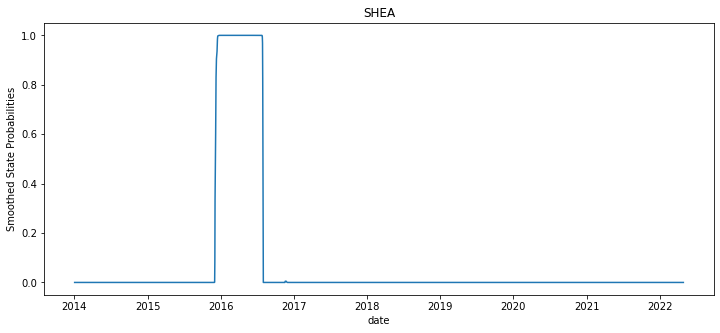

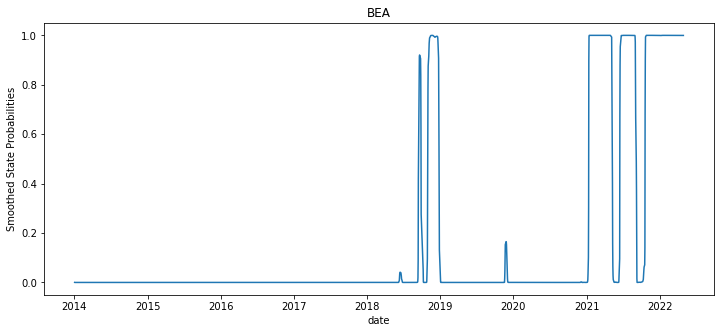

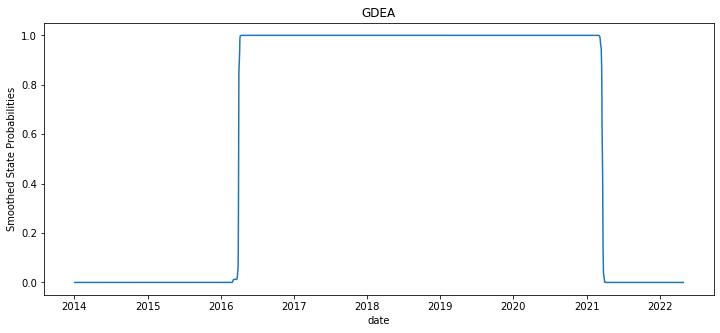

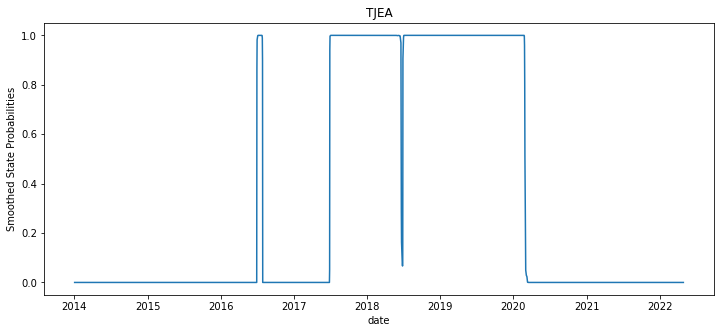

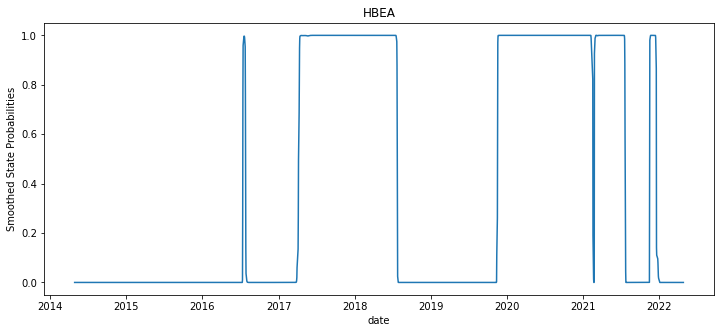

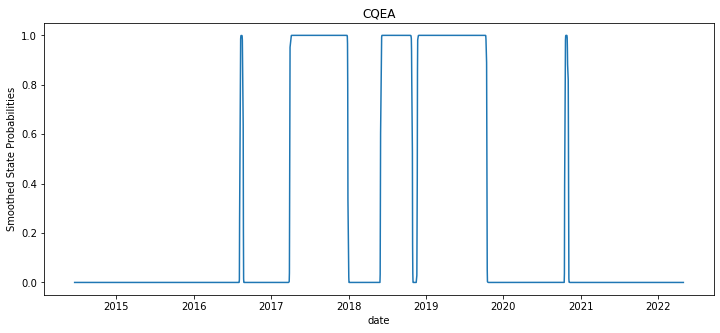

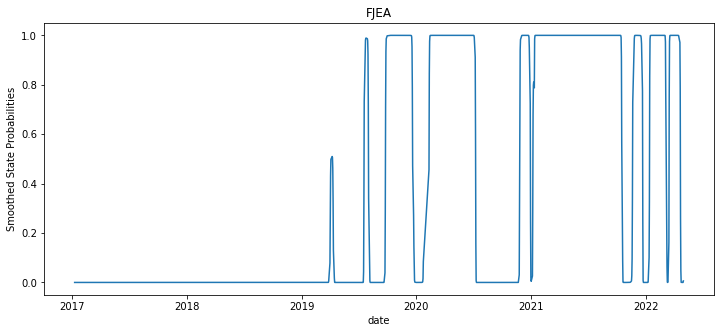

In [11]:
## CEA模型区制不转移
for city in col:
    dta = data.loc[:,city].dropna()
    model = sm.tsa.MarkovRegression(dta,k_regimes=2, trend = 't',switching_trend=True,switching_variance=True)
    result = model.fit()
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.plot(result.smoothed_marginal_probabilities[0])
    ax.set_ylabel("Smoothed State Probabilities")
    ax.set_xlabel("date")
    ax.set_title(city)
    fig.savefig(city+" smoothed probability", transparent=True)
    

x1的coef对应着原表格的 $\mu$

sigma2 对应着原表格的 $\sigma_1^2$ (这里代表的是方差，原表格是标准差，要改一下)

P[0->0] 代表着Base继续停留在Base的概率，对应着$P(S_t=1)$,

P[1->0] 代表着spike状态转换到Base的概率

1-P\[1->0](要手动算一下)，代表着spike状态保持spike的概率对应着$P(S_t=2)$

In [ ]:
for city in col:
    dta = data.loc[:,city].dropna()
    model = sm.tsa.MarkovRegression(dta,k_regimes=2, trend = 't',switching_trend=True,switching_variance=True)
    result = model.fit()
    print(f"-----------------------------------------{city}模型结果↓---------------------------------------------")
    print("")
    print(result.summary())
    print("")
    print("")

-----------------------------------------CEA模型结果↓---------------------------------------------

                        Markov Switching Model Results                        
Dep. Variable:                    CEA   No. Observations:                  191
Model:               MarkovRegression   Log Likelihood                -866.989
Date:                Sun, 22 May 2022   AIC                           1745.977
Time:                        02:01:51   BIC                           1765.491
Sample:                             0   HQIC                          1753.881
                                - 191                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4492    821.473   

-----------------------------------------GDEA模型结果↓---------------------------------------------

                        Markov Switching Model Results                        
Dep. Variable:                   GDEA   No. Observations:                 2041
Model:               MarkovRegression   Log Likelihood               -6912.736
Date:                Sun, 22 May 2022   AIC                          13837.472
Time:                        02:01:53   BIC                          13871.199
Sample:                             0   HQIC                         13849.843
                               - 2041                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0167   6.82e-05  